# Informe Técnico - Examen Transversal:

Integrantes:
* Pamela Aldana


Docente:  Carlos Correa   

Sección:MACHINE LEARNING_003V

# Caso de Machine Learning



In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

import numpy as np # Programación vectorial

import pandas as pd # Estructura y manipulación de datos
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Gráficos

import matplotlib.pyplot as plt # Visualización
from matplotlib import style


# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#rt ="/content/drive/MyDrive/Base_clientes_Monopoly THIS.xlsx"
rt="/content/drive/MyDrive/solo_base__clientes_Monopoly.xlsx"

df = pd.read_excel(rt)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Establecer la opción para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [ ]:
# Restablecer la configuración de visualización a su valor predeterminado
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


In [ ]:
df.head(10)


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,Col_T07,ColL1T0_T07,ColL1TE_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,ColMx_T07,PagoNac_T07,PagoInt_T07,EeccNac_T07,EeccInt_T07,UsoL1_T07,UsoL2_T07,UsoLI_T07,IndRev_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T




 ## FASE 1 : COMPRENDER EL NEGOCIO




#El caso "Banco Monopoly/Dormammu"
El banco extranjero llamado "Dormammu" adquiere el banco chileno Monopoly . Dormammu ha encargado a sus ingenieros realizar un análisis de los clientes de Monopoly, comprendiendo su comportamiento y patrones de uso de productos financieros, con el objetivo de desarrollar una estrategia efectiva para abordar este nuevo mercado.

En la base de datos hay que utilizar metodologia Crisp-DM, seleccionar las variables relevantes para su interpretación y proporcionar la información necesaria a los propietarios de Dormammu para que puedan comprender a los clientes de Monopoly y desarrollar una estrategia efectiva para abordar este nuevo mercado.






Variable	Descripción


*   Región	= Región de Residencia
*   Renta	= Renta del cliente
*   Sexo =	Sexo
*   Subsegmento =	Subsegmento
*   Edad =	Edad
*   Adicional	= Indicador de Tenencia de TC adicionales
*   Antiguedad	= Antigüedad del cliente (meses)
*   CambioPin	= Indicador del cambio de clave secreta de la tarjeta
*   Consumo	= Indicador de Crédito de Consumo
*   Debito =	Indicador de Tenencia de TD
*   Ctacte	= Indicador de Cuenta Corriente
*   Cuentas	= Número de cuentas que tiene el cliente
*   Hipotecario	= Indicador de Crédito Hipotecario
*   Internauta =	Indicador de cliente Internauta que usa la web del banco
*   Monoproducto =	Indicador de si el cliente es solo poseedor de una TC
*   TC	= Número de TC que tiene el cliente
*   Dualidad	= Indicador de Dualidad (Cliente es dual si tiene 2 o más TC)
*   CUPO_L1	= Cupo de la tarjeta crédito para compras nacionales
*   CUPO_MX	= Cupo de la tarjeta crédito para compras internacionales
*   CUPO_L2	= Cupo de la tarjeta crédito para avances en cuotas
*   Col_T12	= Colocación del cliente en TC en el mes X
*   ColL1TE_T12	= Revolving del cliente en TC en el mes X
*   EeccInt_T12	= Monto internacional exigido en el estado de cuenta del cliente en el
mes X
*   EeccNac_T12	= Monto nacional exigido en el estado de cuenta del cliente en el mes
X
*   Fac_T12	Monto = facturado por el cliente en TC en el mes X
*   FacAI_T12	= Monto facturado en avances internacionales por el cliente en TC en
el mes X
*   FacAN_T12 =	Monto facturado en avances nacionales por el cliente en TC en el
mes X
*   FacCCOT_T12 =	Monto facturado en compras en cuotas con tasa por el cliente en TC
en el mes X
*   FacCCPC_T12	= Monto facturado en compras en cuotas precio contado por el cliente
en TC en el mes X
*   FacCI_T12	= Monto facturado en compras internacionales por el cliente en TC en
el mes X

*   FacCN_T12	= Monto facturado en compras nacionales por el cliente en TC en el
mes X
*   FacCOL_T12	= Monto facturado en avances en cuotas por el cliente en TC en el mes
X
*   FacDebAtm_T12	= Monto facturado en avances por el cliente en TD en el mes X
*   FacDebCom_T12	= Monto facturado en compras por el cliente en TD en el mes X
*   FacPAT_T12	= Monto facturado en PAT por el cliente en TC en el mes X
*   FlgAct_T12	= Indicador de actividad en el mes X en la TC
*   FlgActAI_T12	= Indicador de actividad en avances internacionales en el mes X en la
TC
*   FlgActAN_T12	= Indicador de actividad en avances nacionales en el mes X en la TC
*   FlgActCCOT_T12	= Indicador de actividad en compras nacionales en cuotas con tasa en
el mes X en la TC
*   FlgActCCPC_T12	= Indicador de actividad en compras nacionales en cuotas precio
contado en el mes X en la TC
*   FlgActCI_T12	= Indicador de actividad en compras internacionales en el mes X en la
TC
*   FlgActCN_T12	= Indicador de actividad en compras nacionales en el mes X en la TC
*   FlgActCOL_T12	= Indicador de actividad en avances en cuotas con tasa en el mes X en
la TC
*   FlgActPAT_T12	= Indicador de actividad en PAT en el mes X en la TC
*   PagoInt_T12	= Monto de pagos de deuda internacional del cliente en el mes X
*   PagoNac_T12	= Monto de pagos de deuda nacional del cliente en el mes X
*   Txs_T12	= Número de transacciones realizados por el cliente en TC en el mes X
*   TxsAI_T12	= Número de transacciones en avances internacionales realizados por
el cliente en TC en el mes X
*   TxsAN_T12	= Número de transacciones en avances nacionales realizados por el
cliente en TC en el mes X
*   TxsCCOT_T12	= Número de transacciones en compras en cuotas con tasa realizados
por el cliente en TC en el mes X
*   TxsCCPC_T12	= Número de transacciones en compras en cuotas precio contado
realizados por el cliente en TC en el mes X
*   TxsCI_T12	= Número de transacciones en compras internacionales realizados por
el cliente en TC en el mes X
*   TxsCN_T12	= Número de transacciones en compras nacionales realizados por el
cliente en TC en el mes X

*   TxsCOL_T12	= Número de transacciones en avances en cuotas por el cliente en TC
en el mes X
*   TxsDebAtm_T12	= Número de transacciones en avances realizados por el cliente en TD
en el mes X
*   TxsDebCom_T12	= Número de transacciones en compras realizados por el cliente en TD
en el mes X
*   TxsPAT_T12	= Número de transacciones en PAT realizados por el cliente en TC en el
mes X
*   UsoL1_T12	= Monto de deuda en la línea de compras en la TC en el mes X
*   UsoL2_T12	= Monto de deuda en la línea de avances en cuotas en la TC en el mes
X
*   UsoLI_T12	= Monto de deuda en la línea de compras internacionales en la TC en
el mes X



#Datos:
 La base de datos muestra  información clientes de Monopoly que contiene 12 meses de información mensual para cada cliente, lo que resulta en un total de 574 variables y 51124 registros.




#Variables :
Las variables Cuantitativa discreta son las de tipo  int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13) .








---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB


## FASE 2 : COMPRENDER LO DATOS




In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.

# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.

# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

##Analisis exploratorio de los datos

In [ ]:
# Establecer la opción para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [ ]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,IndRev_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,IndRev_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,IndRev_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,IndRev_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,IndRev_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,Col_T07,ColL1T0_T07,ColL1TE_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,ColMx_T07,PagoNac_T07,PagoInt_T07,EeccNac_T07,EeccInt_T07,UsoL1_T07,UsoL2_T07,UsoLI_T07,IndRev_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,IndRev_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T

En esta base de datos hay variables categoricas las cuales se deben transformar a numericas o eliminar para el metodo k-means, tambien se observa que los datos estan en diferentes escalas donde los max , min , mean son muy altos y otro muy bajos , esto no permite un buen analisis de los datos ya que los datos con mayor cantidad son los que utilizan los modelos.

###Se revisa la cantidad de filas y columnas  de la base de datos inicial
cantidad columna: 574
cantidad filas: 51124


In [ ]:
df.shape

(51124, 574)

## Este codigo, df.columns nos muestra el nombre de las variables

In [ ]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

###  Se visualizan  la cantidad de filas que son 51124 y columnas 574, los tipos de datos  son float64())
508), int64(53), object(13).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB


Estas variables de tipo object se deben transformar mediante one-hot endoding o eliminar, se evaluara mas adelante


#Variables :
Las variables Cuantitativa discreta son las de tipo  int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13) .






In [ ]:
#  variables categóricas
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']


Se separan en una variable la variables categoricas para tener un mejor manejo de ellas

###Se muestra la cantidad de valores nulos NULL en cada columna ordenados de mayor a menor

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

CambioPin         19388
Renta             13365
UsoL1_T12          8251
TxsCCPC_T12        8251
FacDebCom_T12      8251
TxsCOL_T12         8251
FacCOL_T12         8251
TxsCCOT_T12        8251
FacCCOT_T12        8251
FacCCPC_T12        8251
FacDebAtm_T12      8251
TxsPAT_T12         8251
FacPAT_T12         8251
TxsAI_T12          8251
FacAI_T12          8251
TxsAN_T12          8251
FacAN_T12          8251
TxsDebCom_T12      8251
TxsDebAtm_T12      8251
FacCI_T12          8251
Col_T12            8251
ColL1TE_T12        8251
ColL2T0_T12        8251
ColL2AC_T12        8251
ColL2CC_T12        8251
ColMx_T12          8251
PagoNac_T12        8251
PagoInt_T12        8251
EeccNac_T12        8251
EeccInt_T12        8251
UsoL2_T12          8251
UsoLI_T12          8251
IndRev_T12         8251
TxsCI_T12          8251
ColL1T0_T12        8251
TxsCN_T12          8251
FlgActPAT_T12      8251
FacCN_T12          8251
FlgAct_T12         8251
FlgActCN_T12       8251
FlgActCI_T12       8251
FlgActAI_T12    

Vemos que la variable CambioPin tiene gran cantidad de datos nulos, es  alrededor del 30% , se eliminara esta variable

In [ ]:
total_nulos = df.isnull().sum().sum()
print(f'Total de valores nulos en el DataFrame: {total_nulos}')

Total de valores nulos en el DataFrame: 1275547


In [ ]:
df.isnull().sum().sum()

1275547

El total de nulos es 1275547 estos son menos del 10% de los datos del Dataframe.

# Estadísticas descriptivas para las variables numéricas



Analizamos los datos  para ver el tipo de distribucion de cada variable y las medidas de dispersion

In [ ]:
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,Col_T07,ColL1T0_T07,ColL1TE_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,ColMx_T07,PagoNac_T07,PagoInt_T07,EeccNac_T07,EeccInt_T07,UsoL1_T07,UsoL2_T07,UsoLI_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05

###Analisis de algunas variables
La mediana representa la mitad de los datos.Ordenados de menor a mayor.
 La mitad de las personas en ese conjunto de datos tienen edades menores o iguales a 35 años, y la otra mitad tiene edades mayores o iguales a 35 años.
La mitad de las observaciones en ese conjunto de datos tienen  rentas menores o iguales a 567012 , y la otra mitad tiene rentas mayores o iguales a 567012.

La media representa el promedio:
UsoL1_T01 : el Monto de deuda en la linea de compras internacionales en la TC en el mes 01 es de 184092 en promedio por cliente

## Analisis  exploratorio:  




Analisis exploratorio con otras variables  revisar su distribucion, si hay sesgo, cuantos nulos, outliers y mas

#Visualizacion de  distribuciones de variables numéricas y categóricas utilizando gráficos.

#Variables Numericas

In [ ]:
col_num=['Id', 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'Fac_T11', 'Txs_T11', 'FacCN_T11', 'TxsCN_T11', 'FacCI_T11', 'TxsCI_T11', 'FacAN_T11', 'TxsAN_T11', 'FacAI_T11', 'TxsAI_T11', 'FacPAT_T11', 'TxsPAT_T11', 'FacCCPC_T11', 'TxsCCPC_T11', 'FacCCOT_T11', 'TxsCCOT_T11', 'FacCOL_T11', 'TxsCOL_T11', 'FacDebCom_T11', 'TxsDebCom_T11', 'FacDebAtm_T11', 'TxsDebAtm_T11', 'Col_T11', 'ColL1T0_T11', 'ColL1TE_T11', 'ColL2T0_T11', 'ColL2AC_T11', 'ColL2CC_T11', 'ColMx_T11', 'PagoNac_T11', 'PagoInt_T11', 'EeccNac_T11', 'EeccInt_T11', 'UsoL1_T11', 'UsoL2_T11', 'UsoLI_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'Fac_T10', 'Txs_T10', 'FacCN_T10', 'TxsCN_T10', 'FacCI_T10', 'TxsCI_T10', 'FacAN_T10', 'TxsAN_T10', 'FacAI_T10', 'TxsAI_T10', 'FacPAT_T10', 'TxsPAT_T10', 'FacCCPC_T10', 'TxsCCPC_T10', 'FacCCOT_T10', 'TxsCCOT_T10', 'FacCOL_T10', 'TxsCOL_T10', 'FacDebCom_T10', 'TxsDebCom_T10', 'FacDebAtm_T10', 'TxsDebAtm_T10', 'Col_T10', 'ColL1T0_T10', 'ColL1TE_T10', 'ColL2T0_T10', 'ColL2AC_T10', 'ColL2CC_T10', 'ColMx_T10', 'PagoNac_T10', 'PagoInt_T10', 'EeccNac_T10', 'EeccInt_T10', 'UsoL1_T10', 'UsoL2_T10', 'UsoLI_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09', 'FlgActAI_T09', 'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09', 'FlgActCOL_T09', 'Fac_T09', 'Txs_T09', 'FacCN_T09', 'TxsCN_T09', 'FacCI_T09', 'TxsCI_T09', 'FacAN_T09', 'TxsAN_T09', 'FacAI_T09', 'TxsAI_T09', 'FacPAT_T09', 'TxsPAT_T09', 'FacCCPC_T09', 'TxsCCPC_T09', 'FacCCOT_T09', 'TxsCCOT_T09', 'FacCOL_T09', 'TxsCOL_T09', 'FacDebCom_T09', 'TxsDebCom_T09', 'FacDebAtm_T09', 'TxsDebAtm_T09', 'Col_T09', 'ColL1T0_T09', 'ColL1TE_T09', 'ColL2T0_T09', 'ColL2AC_T09', 'ColL2CC_T09', 'ColMx_T09', 'PagoNac_T09', 'PagoInt_T09', 'EeccNac_T09', 'EeccInt_T09', 'UsoL1_T09', 'UsoL2_T09', 'UsoLI_T09', 'FlgAct_T08', 'FlgActCN_T08', 'FlgActCI_T08', 'FlgActAN_T08', 'FlgActAI_T08', 'FlgActPAT_T08', 'FlgActCCPC_T08', 'FlgActCCOT_T08', 'FlgActCOL_T08', 'Fac_T08', 'Txs_T08', 'FacCN_T08', 'TxsCN_T08', 'FacCI_T08', 'TxsCI_T08', 'FacAN_T08', 'TxsAN_T08', 'FacAI_T08', 'TxsAI_T08', 'FacPAT_T08', 'TxsPAT_T08', 'FacCCPC_T08', 'TxsCCPC_T08', 'FacCCOT_T08', 'TxsCCOT_T08', 'FacCOL_T08', 'TxsCOL_T08', 'FacDebCom_T08', 'TxsDebCom_T08', 'FacDebAtm_T08', 'TxsDebAtm_T08', 'Col_T08', 'ColL1T0_T08', 'ColL1TE_T08', 'ColL2T0_T08', 'ColL2AC_T08', 'ColL2CC_T08', 'ColMx_T08', 'PagoNac_T08', 'PagoInt_T08', 'EeccNac_T08', 'EeccInt_T08', 'UsoL1_T08', 'UsoL2_T08', 'UsoLI_T08', 'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07', 'FlgActCCOT_T07', 'FlgActCOL_T07', 'Fac_T07', 'Txs_T07', 'FacCN_T07', 'TxsCN_T07', 'FacCI_T07', 'TxsCI_T07', 'FacAN_T07', 'TxsAN_T07', 'FacAI_T07', 'TxsAI_T07', 'FacPAT_T07', 'TxsPAT_T07', 'FacCCPC_T07', 'TxsCCPC_T07', 'FacCCOT_T07', 'TxsCCOT_T07', 'FacCOL_T07', 'TxsCOL_T07', 'FacDebCom_T07', 'TxsDebCom_T07', 'FacDebAtm_T07', 'TxsDebAtm_T07', 'Col_T07', 'ColL1T0_T07', 'ColL1TE_T07', 'ColL2T0_T07', 'ColL2AC_T07', 'ColL2CC_T07', 'ColMx_T07', 'PagoNac_T07', 'PagoInt_T07', 'EeccNac_T07', 'EeccInt_T07', 'UsoL1_T07', 'UsoL2_T07', 'UsoLI_T07', 'FlgAct_T06', 'FlgActCN_T06', 'FlgActCI_T06', 'FlgActAN_T06', 'FlgActAI_T06', 'FlgActPAT_T06', 'FlgActCCPC_T06', 'FlgActCCOT_T06', 'FlgActCOL_T06', 'Fac_T06', 'Txs_T06', 'FacCN_T06', 'TxsCN_T06', 'FacCI_T06', 'TxsCI_T06', 'FacAN_T06', 'TxsAN_T06', 'FacAI_T06', 'TxsAI_T06', 'FacPAT_T06', 'TxsPAT_T06', 'FacCCPC_T06', 'TxsCCPC_T06', 'FacCCOT_T06', 'TxsCCOT_T06', 'FacCOL_T06', 'TxsCOL_T06', 'FacDebCom_T06', 'TxsDebCom_T06', 'FacDebAtm_T06', 'TxsDebAtm_T06', 'Col_T06', 'ColL1T0_T06', 'ColL1TE_T06', 'ColL2T0_T06', 'ColL2AC_T06', 'ColL2CC_T06', 'ColMx_T06', 'PagoNac_T06', 'PagoInt_T06', 'EeccNac_T06', 'EeccInt_T06', 'UsoL1_T06', 'UsoL2_T06', 'UsoLI_T06', 'FlgAct_T05', 'FlgActCN_T05', 'FlgActCI_T05', 'FlgActAN_T05', 'FlgActAI_T05', 'FlgActPAT_T05', 'FlgActCCPC_T05', 'FlgActCCOT_T05', 'FlgActCOL_T05', 'Fac_T05', 'Txs_T05', 'FacCN_T05', 'TxsCN_T05', 'FacCI_T05', 'TxsCI_T05', 'FacAN_T05', 'TxsAN_T05', 'FacAI_T05', 'TxsAI_T05', 'FacPAT_T05', 'TxsPAT_T05', 'FacCCPC_T05', 'TxsCCPC_T05', 'FacCCOT_T05', 'TxsCCOT_T05', 'FacCOL_T05', 'TxsCOL_T05', 'FacDebCom_T05', 'TxsDebCom_T05', 'FacDebAtm_T05', 'TxsDebAtm_T05', 'Col_T05', 'ColL1T0_T05', 'ColL1TE_T05', 'ColL2T0_T05', 'ColL2AC_T05', 'ColL2CC_T05', 'ColMx_T05', 'PagoNac_T05', 'PagoInt_T05', 'EeccNac_T05', 'EeccInt_T05', 'UsoL1_T05', 'UsoL2_T05', 'UsoLI_T05', 'FlgAct_T04', 'FlgActCN_T04', 'FlgActCI_T04', 'FlgActAN_T04', 'FlgActAI_T04', 'FlgActPAT_T04', 'FlgActCCPC_T04', 'FlgActCCOT_T04', 'FlgActCOL_T04', 'Fac_T04', 'Txs_T04', 'FacCN_T04', 'TxsCN_T04', 'FacCI_T04', 'TxsCI_T04', 'FacAN_T04', 'TxsAN_T04', 'FacAI_T04', 'TxsAI_T04', 'FacPAT_T04', 'TxsPAT_T04', 'FacCCPC_T04', 'TxsCCPC_T04', 'FacCCOT_T04', 'TxsCCOT_T04', 'FacCOL_T04', 'TxsCOL_T04', 'FacDebCom_T04', 'TxsDebCom_T04', 'FacDebAtm_T04', 'TxsDebAtm_T04', 'Col_T04', 'ColL1T0_T04', 'ColL1TE_T04', 'ColL2T0_T04', 'ColL2AC_T04', 'ColL2CC_T04', 'ColMx_T04', 'PagoNac_T04', 'PagoInt_T04', 'EeccNac_T04', 'EeccInt_T04', 'UsoL1_T04', 'UsoL2_T04', 'UsoLI_T04', 'FlgAct_T03', 'FlgActCN_T03', 'FlgActCI_T03', 'FlgActAN_T03', 'FlgActAI_T03', 'FlgActPAT_T03', 'FlgActCCPC_T03', 'FlgActCCOT_T03', 'FlgActCOL_T03', 'Fac_T03', 'Txs_T03', 'FacCN_T03', 'TxsCN_T03', 'FacCI_T03', 'TxsCI_T03', 'FacAN_T03', 'TxsAN_T03', 'FacAI_T03', 'TxsAI_T03', 'FacPAT_T03', 'TxsPAT_T03', 'FacCCPC_T03', 'TxsCCPC_T03', 'FacCCOT_T03', 'TxsCCOT_T03', 'FacCOL_T03', 'TxsCOL_T03', 'FacDebCom_T03', 'TxsDebCom_T03', 'FacDebAtm_T03', 'TxsDebAtm_T03', 'Col_T03', 'ColL1T0_T03', 'ColL1TE_T03', 'ColL2T0_T03', 'ColL2AC_T03', 'ColL2CC_T03', 'ColMx_T03', 'PagoNac_T03', 'PagoInt_T03', 'EeccNac_T03', 'EeccInt_T03', 'UsoL1_T03', 'UsoL2_T03', 'UsoLI_T03', 'FlgAct_T02', 'FlgActCN_T02', 'FlgActCI_T02', 'FlgActAN_T02', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02', 'FlgActCCOT_T02', 'FlgActCOL_T02', 'Fac_T02', 'Txs_T02', 'FacCN_T02', 'TxsCN_T02', 'FacCI_T02', 'TxsCI_T02', 'FacAN_T02', 'TxsAN_T02', 'FacAI_T02', 'TxsAI_T02', 'FacPAT_T02', 'TxsPAT_T02', 'FacCCPC_T02', 'TxsCCPC_T02', 'FacCCOT_T02', 'TxsCCOT_T02', 'FacCOL_T02', 'TxsCOL_T02', 'FacDebCom_T02', 'TxsDebCom_T02', 'FacDebAtm_T02', 'TxsDebAtm_T02', 'Col_T02', 'ColL1T0_T02', 'ColL1TE_T02', 'ColL2T0_T02', 'ColL2AC_T02', 'ColL2CC_T02', 'ColMx_T02', 'PagoNac_T02', 'PagoInt_T02', 'EeccNac_T02', 'EeccInt_T02', 'UsoL1_T02', 'UsoL2_T02', 'UsoLI_T02', 'FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01', 'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01', 'Fac_T01', 'Txs_T01', 'FacCN_T01', 'TxsCN_T01', 'FacCI_T01', 'TxsCI_T01', 'FacAN_T01', 'TxsAN_T01', 'FacAI_T01', 'TxsAI_T01', 'FacPAT_T01', 'TxsPAT_T01', 'FacCCPC_T01', 'TxsCCPC_T01', 'FacCCOT_T01', 'TxsCCOT_T01', 'FacCOL_T01', 'TxsCOL_T01', 'FacDebCom_T01', 'TxsDebCom_T01', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'Col_T01', 'ColL1T0_T01', 'ColL1TE_T01', 'ColL2T0_T01', 'ColL2AC_T01', 'ColL2CC_T01', 'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'target']


Las separamos para analizarlas , por ejemplo ID es una variable que no me entrega informacion importante para el analisis.

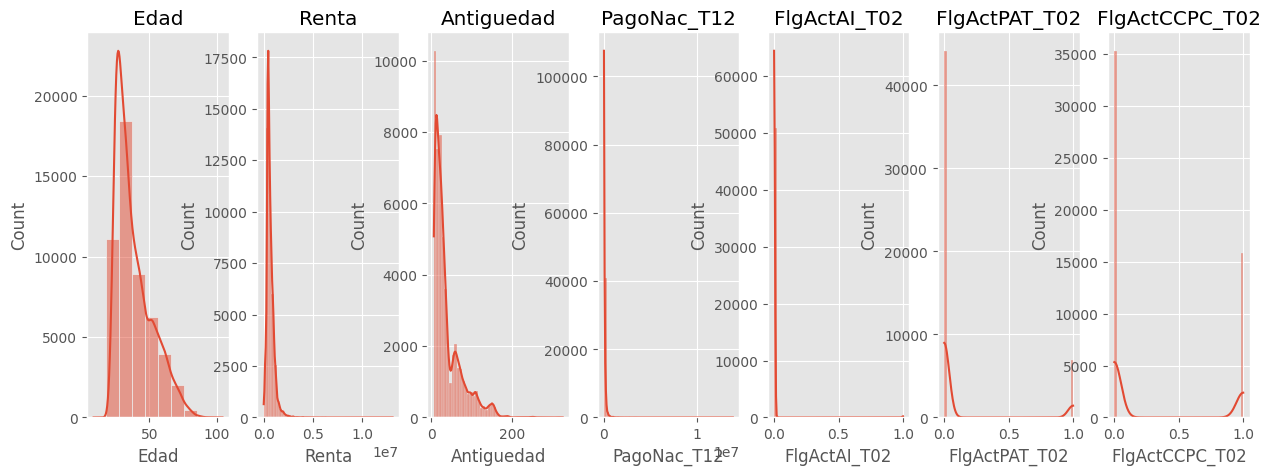

In [ ]:
# Dibujar histogramas
col_nume = ['Edad', 'Renta', 'Antiguedad','PagoNac_T12', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02']

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_nume):
    if col == 'Edad':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

Podemos ver que hay variables como PagoNac_T_12 [0,1], FlActAI_T02 y otras ,que fueron transformdas a numericas pero son de origen categoricas , estas variables las eliminaremos para el metodo k-means, ya que entregan datos matematicos , mas bien de clasificacion.

- Observaciones:

- La mayor parte de los clientes  tiene edades entre los 28 y los 38 años, con sesgo hacia los 20-35años
- Los mayoria de los clientes  tienen Renta baja.Los datos están sesgados hacia la izquierda o tiene un sesgo negativo(La media es menor que la mediana.).Se debe utilizar  la mediana en lugar de la media, ya que la media puede verse afectada por los valores extremadamente bajos.
- la mayor cantidad de clientes son nuevos.
- todas las variables tan sesgadas a la derecha .

Esta variable''Renta contiene muchos datos faltantes el total es 13365

Este codigo nos muestra la cantidad de datos de la variable 'Renta'que son:  37.759



 La variable "Renta" tienen una variabilidad moderada en comparación con la media. Esto significa que los sueldos de los clientes pueden variar significativamente en torno a la media, lo que podría indicar que hay una amplia gama de sueldos entre los clientes.

Esta variable Renta debe preparar los datos ya que tiene muchos valores faltantes .

##Renta
El percentil 25 (primer cuartil) es 419999.00. Esto significa que el 25% de los clientes tienen un sueldo igual o inferior a esta cantidad.

El percentil 50 (la mediana) es 567012.00. Esto significa que el 50% de los clientes tienen un sueldo igual o inferior a esta cantidad.

El percentil 75 (el tercer cuartil) es 814,903.50. Esto significa que el 75% de los clientes tienen un sueldo igual o inferior a esta cantidad.

El percentil 99 es 2074,857.56. Esto significa que el 99% de los clientes tienen un sueldo igual o inferior a esta cantidad.

 Los percentile 99, se identifican  valores atípicos o extremadamente altos, por representa una mayor carga de datos en la distribución de sueldos.


# Valores nulos



In [ ]:
df.isna().sum(axis=0) # ver los datos despues de eliminar los nulos

Id                    0
Subsegmento           0
Sexo                  1
Region               53
Edad                  0
Renta             13365
Antiguedad            0
Internauta            0
Adicional             0
Dualidad              0
Monoproducto          0
Ctacte                0
Consumo               0
Hipotecario           0
Debito                0
CambioPin         19388
Cuentas               0
TC                    0
CUPO_L1               0
CUPO_L2               0
CUPO_MX               0
FlgAct_T12         8251
FlgActCN_T12       8251
FlgActCI_T12       8251
FlgActAN_T12       8251
FlgActAI_T12       8251
FlgActPAT_T12      8251
FlgActCCPC_T12     8251
FlgActCCOT_T12     8251
FlgActCOL_T12      8251
Fac_T12            8251
Txs_T12            8251
FacCN_T12          8251
TxsCN_T12          8251
FacCI_T12          8251
TxsCI_T12          8251
FacAN_T12          8251
TxsAN_T12          8251
FacAI_T12          8251
TxsAI_T12          8251
FacPAT_T12         8251
TxsPAT_T12      

Por ejemplo :La columna sexo tiene 1 y region 53

##Correlacion



---



In [ ]:
df_corr=df.corr()

In [ ]:
df_corr.head()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target
Id,1.000000,0.054252,-0.013686,0.332918,0.015980,0.145347,-0.155182,0.050817,-0.093430,0.084117,...,-0.003318,0.000092,0.000309,-0.004642,-0.006137,0.005245,-0.000753,-0.017258,0.001175,0.018496
Subsegmento,0.054252,1.000000,-0.047450,-0.519442,0.010060,-0.271497,0.207811,-0.159026,-0.140818,-0.157122,...,-0.047635,0.004616,-0.074260,-0.002261,-0.147534,-0.000986,-0.148976,-0.036433,0.001709,-0.021646
Region,-0.013686,-0.047450,1.000000,0.010729,-0.007266,0.046028,0.054414,0.097302,0.014180,0.047502,...,0.010010,0.017202,0.017824,0.005389,0.021217,0.011630,0.020277,0.024365,0.010459,-0.014621
Edad,0.332918,-0.519442,0.010729,1.000000,0.143001,0.524487,-0.389240,0.235544,0.013080,0.243881,...,0.034772,0.004684,0.102946,0.000022,0.178563,0.006823,0.183384,0.016585,0.004555,0.055389
Renta,0.015980,0.010060,-0.007266,0.143001,1.000000,0.086308,0.000227,0.035191,0.015237,0.045551,...,0.053663,0.063941,0.095831,0.016146,0.099443,0.042468,0.092393,0.035728,0.050117,-0.013111


<Axes: >

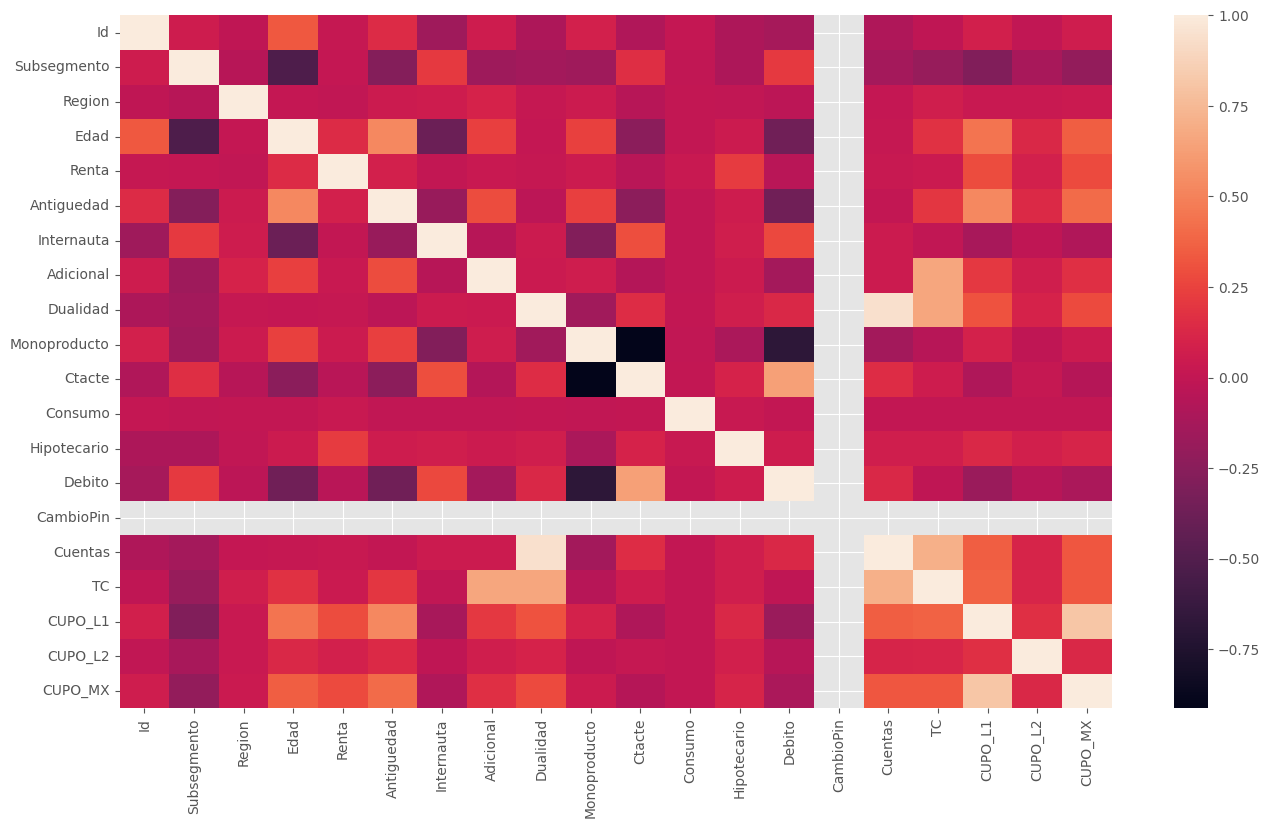

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_corr.iloc[:20,:20])

 Se describe la relación o asociación entre dos variables. La correlación nos proporciona información sobre cómo dos variables numéricas están relacionadas entre sí.Las variables que están altamente correlacionadas entre sí, se  considerar eliminar una de ellas para evitar la multicolinealidad, que puede afectar la interpretación del resultado del K-Means.

## FASE 3 : PREPARAR LOS DATOS


Esta fase implica el preprocesamiento de los datos. Incluye la limpieza de datos, la selección de características, la transformación de datos y la creación de conjuntos de datos adecuados para el modelado.

#Eliminar columnas irrelevantes
- Una columna categórica pero con un sólo nivel.
No existen el dataset
- Una columna numérica pero con un sólo valor.
No existen en dataset




In [ ]:
df1=df

In [ ]:
df2=df
df2.shape

(51124, 574)

In [ ]:
df.shape

(51124, 574)

La columnas CambioPin tienen desviaciones estándar ("std") igual cero, lo que indica que  tienen un único valor.

Borraremos esta variable

Se elimina las variable'CambioPIn' con un 37% de datos faltantes ;no es  importantes a considerar al para el perfil de clientes que paga total del monto de deuda.


In [ ]:
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,Col_T07,ColL1T0_T07,ColL1TE_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,ColMx_T07,PagoNac_T07,PagoInt_T07,EeccNac_T07,EeccInt_T07,UsoL1_T07,UsoL2_T07,UsoLI_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05

Reviso si hay valores unicos para eliminar esas variables, cambio de pin tiene 1 unico valor , no entrega informacion al dataset.

In [ ]:
df[df.columns].nunique()

Id                51124
Subsegmento          16
Sexo                  2
Region               13
Edad                 79
Renta             33825
Antiguedad          233
Internauta            2
Adicional             2
Dualidad              2
Monoproducto          2
Ctacte                2
Consumo               2
Hipotecario           2
Debito                2
CambioPin             1
Cuentas               5
TC                   12
CUPO_L1            8066
CUPO_L2            3812
CUPO_MX            3195
FlgAct_T12            2
FlgActCN_T12          2
FlgActCI_T12          2
FlgActAN_T12          2
FlgActAI_T12          2
FlgActPAT_T12         2
FlgActCCPC_T12        2
FlgActCCOT_T12        2
FlgActCOL_T12         2
Fac_T12           21298
Txs_T12              48
FacCN_T12         18441
TxsCN_T12            47
FacCI_T12          1224
TxsCI_T12            28
FacAN_T12           254
TxsAN_T12             8
FacAI_T12           107
TxsAI_T12            10
FacPAT_T12         3790
TxsPAT_T12      

In [ ]:
# Identificar columnas con menos de 8 valores únicos
columnas_pocas_categorias = [columna for columna in df.columns if df[columna].nunique() < 8]

# Imprimir el resultado
print("Columnas con menos de 8 valores únicos:")
print(columnas_pocas_categorias)


Columnas con menos de 8 valores únicos:
['TxsAN_T12', 'TxsAI_T12', 'TxsCOL_T12', 'TxsAN_T11', 'TxsAI_T11', 'TxsCOL_T11', 'TxsAN_T10', 'TxsAI_T10', 'TxsCCOT_T10', 'TxsCOL_T10', 'TxsAI_T09', 'TxsCCOT_T09', 'TxsCOL_T09', 'TxsAN_T08', 'TxsAI_T08', 'TxsCCOT_T08', 'TxsCOL_T08', 'TxsAN_T07', 'TxsAI_T07', 'TxsCOL_T07', 'TxsCOL_T06', 'TxsAN_T05', 'TxsCCOT_T05', 'TxsCOL_T05', 'TxsAN_T04', 'TxsCCOT_T04', 'TxsCOL_T04', 'TxsAN_T03', 'TxsAI_T03', 'TxsCOL_T03', 'TxsAN_T02', 'TxsCCOT_T02', 'TxsCOL_T02', 'TxsCOL_T01']


In [ ]:
df= df.drop(['ColL2AC_T03', 'FlgActCN_T02',	'FlgActCI_T02',	'FlgActAN_T02',	'FlgActCCOT_T02',	'FlgActCOL_T02'], axis=1).copy()

In [ ]:
df= df.drop(['ColL2AC_T09', 'FlgAct_T08', 'FlgActCN_T08',	'FlgActCI_T08',	'FlgActAN_T08',	'FlgActAI_T08',	'FlgActPAT_T08',	'FlgActCCPC_T08',	'FlgActCCOT_T08',	'FlgActCOL_T08'], axis=1).copy()

In [ ]:
df= df.drop(['ColL2AC_T12',	'ColL2CC_T12', 'ColMx_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'ColL2AC_T11', 'ColMx_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09',	'FlgActAI_T09',	'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09',	'FlgActCOL_T09'], axis=1).copy()

In [ ]:
df= df.drop(['FlgActCCOT_T12', 'FlgActCOL_T12', 'target'], axis=1).copy()

In [ ]:
df= df.drop(['FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12'], axis=1).copy()

In [ ]:
df= df.drop(['Internauta', 'Adicional', 'Ctacte', 'Consumo','Hipotecario',	'Debito',	'Cuentas', 'Id','CambioPin','Subsegmento','Dualidad', 'Monoproducto','Region','Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07', 'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01'], axis=1).copy()

In [ ]:
df= df.drop(['Edad','ColL2AC_T01', 'ColMx_T01','FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12'], axis=1).copy()

In [ ]:
df= df.drop(['Antiguedad','TC'], axis=1).copy()

In [ ]:
df= df.drop(['TxsAN_T12', 'TxsAI_T12', 'TxsCOL_T12', 'TxsAN_T11', 'TxsAI_T11', 'TxsCOL_T11', 'TxsAN_T10', 'TxsAI_T10', 'TxsCCOT_T10', 'TxsCOL_T10', 'TxsAI_T09', 'TxsCCOT_T09', 'TxsCOL_T09', 'TxsAN_T08', 'TxsAI_T08', 'TxsCCOT_T08', 'TxsCOL_T08', 'TxsAN_T07', 'TxsAI_T07', 'TxsCOL_T07', 'TxsCOL_T06', 'TxsAN_T05', 'TxsCCOT_T05', 'TxsCOL_T05', 'TxsAN_T04', 'TxsCCOT_T04', 'TxsCOL_T04', 'TxsAN_T03', 'TxsAI_T03', 'TxsCOL_T03', 'TxsAN_T02', 'TxsCCOT_T02', 'TxsCOL_T02', 'TxsCOL_T01'], axis=1).copy()

In [ ]:
columnas_a_eliminar = [
    'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07',
    'FlgActCCOT_T07', 'FlgActCOL_T07', 'FlgAct_T06', 'FlgActCN_T06', 'FlgActCI_T06', 'FlgActAN_T06', 'FlgActAI_T06',
    'FlgActPAT_T06', 'FlgActCCPC_T06', 'FlgActCCOT_T06', 'FlgActCOL_T06', 'FlgAct_T05', 'FlgActCN_T05', 'FlgActCI_T05',
    'FlgActAN_T05', 'FlgActAI_T05', 'FlgActPAT_T05', 'FlgActCCPC_T05', 'FlgActCCOT_T05', 'FlgActCOL_T05', 'FlgAct_T04',
    'FlgActCN_T04', 'FlgActCI_T04', 'FlgActAN_T04', 'FlgActAI_T04', 'FlgActPAT_T04', 'FlgActCCPC_T04', 'FlgActCCOT_T04',
    'FlgActCOL_T04', 'FlgAct_T03', 'FlgActCN_T03', 'FlgActCI_T03', 'FlgActAN_T03', 'FlgActAI_T03', 'FlgActPAT_T03',
    'FlgActCCPC_T03', 'FlgActCCOT_T03', 'FlgActCOL_T03', 'FlgAct_T02', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02',
    'Col_T01', 'ColL1T0_T01', 'ColL1TE_T01', 'ColL2T0_T01', 'ColL2CC_T01', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12',
    'ColL2T0_T12', 'Col_T11', 'ColL1T0_T11', 'ColL1TE_T11', 'ColL2T0_T11', 'ColL2CC_T11', 'ColL1T0_T10', 'ColL1TE_T10',
    'ColL2T0_T10', 'ColL2CC_T10', 'ColMx_T10', 'Col_T09', 'ColL1T0_T09', 'ColL1TE_T09', 'ColL2T0_T09', 'ColL2CC_T09',
    'Col_T10', 'ColMx_T09', 'Col_T08', 'ColL1T0_T08', 'ColL1TE_T08', 'ColL2T0_T08', 'ColL2AC_T08', 'ColL2CC_T08',
    'ColMx_T08', 'ColL1T0_T02', 'ColL1TE_T02', 'ColL2T0_T02', 'ColL2AC_T02', 'ColL2CC_T02', 'ColMx_T02', 'Col_T07',
    'ColL1T0_T07', 'ColL1TE_T07', 'ColL2T0_T07', 'ColL2AC_T07', 'ColL2CC_T07', 'Col_T06', 'ColL1T0_T06', 'ColL1TE_T06',
    'ColL2T0_T06', 'ColL2AC_T06', 'ColL2CC_T06', 'Col_T05', 'ColL1T0_T05', 'ColL1TE_T05', 'ColL2T0_T05', 'ColL2AC_T05',
    'ColL2CC_T05', 'Col_T04', 'ColL1T0_T04', 'ColL1TE_T04', 'ColL2T0_T04', 'ColL2AC_T04', 'ColL2CC_T04', 'Col_T03',
    'ColL1T0_T03', 'ColL1TE_T03', 'ColL2T0_T03', 'ColL2CC_T03', 'ColMx_T03', 'ColMx_T07', 'ColMx_T06', 'ColMx_T05',
    'ColMx_T04', 'FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01',
    'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01'
]

# Eliminar las columnas del DataFrame
df = df.drop(columnas_a_eliminar, axis=1).copy()


In [ ]:
df.shape

(51124, 320)

In [ ]:
df1=df

In [ ]:
df_sin_colum= df

In [ ]:
print(df.columns)


Index(['Renta', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12', 'Txs_T12',
       'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12',
       ...
       'TxsDebCom_T01', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'PagoNac_T01',
       'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01',
       'UsoLI_T01'],
      dtype='object', length=320)


In [ ]:
df.shape

(51124, 320)

## Variables escogidas
CUPO_L1 = Cupo de la tarjeta crédito para compras nacionales

CUPO_MX = Cupo de la tarjeta crédito para compras internacionales

CUPO_L2 = Cupo de la tarjeta crédito para avances en cuotas


EeccInt_T12 = Monto internacional exigido en el estado de cuenta del cliente en el mes X

EeccNac_T12 = Monto nacional exigido en el estado de cuenta del cliente en el mes X

Fac_T12 Monto = facturado por el cliente en TC en el mes X

FacAI_T12 = Monto facturado en avances internacionales por el cliente en TC en el mes X

FacAN_T12 = Monto facturado en avances nacionales por el cliente en TC en el mes X

FacCCOT_T12 = Monto facturado en compras en cuotas con tasa por el cliente en TC en el mes X

FacCCPC_T12 = Monto facturado en compras en cuotas precio contado por el cliente en TC en el mes X

FacCI_T12 = Monto facturado en compras internacionales por el cliente en TC en el mes X

FacCN_T12 = Monto facturado en compras nacionales por el cliente en TC en el mes X

FacCOL_T12 = Monto facturado en avances en cuotas por el cliente en TC en el mes X

FacDebAtm_T12 = Monto facturado en avances por el cliente en TD en el mes X

FacDebCom_T12 = Monto facturado en compras por el cliente en TD en el mes X

FacPAT_T12 = Monto facturado en PAT por el cliente en TC en el mes X

PagoInt_T12 = Monto de pagos de deuda internacional del cliente en el mes X

PagoNac_T12 = Monto de pagos de deuda nacional del cliente en el mes X

Txs_T12 = Número de transacciones realizados por el cliente en TC en el mes X

TxsAI_T12 = Número de transacciones en avances internacionales realizados por el cliente en TC en el mes X

TxsAN_T12 = Número de transacciones en avances nacionales realizados por el cliente en TC en el mes X

TxsCCOT_T12 = Número de transacciones en compras en cuotas con tasa realizados por el cliente en TC en el mes X

TxsCCPC_T12 = Número de transacciones en compras en cuotas precio contado realizados por el cliente en TC en el mes X

TxsCI_T12 = Número de transacciones en compras internacionales realizados por el cliente en TC en el mes X

TxsCN_T12 = Número de transacciones en compras nacionales realizados por el cliente en TC en el mes X

TxsCOL_T12 = Número de transacciones en avances en cuotas por el cliente en TC en el mes X

TxsDebAtm_T12 = Número de transacciones en avances realizados por el cliente en TD en el mes X

TxsDebCom_T12 = Número de transacciones en compras realizados por el cliente en TD en el mes X

TxsPAT_T12 = Número de transacciones en PAT realizados por el cliente en TC en el mes X

UsoL1_T12 = Monto de deuda en la línea de compras en la TC en el mes X

UsoL2_T12 = Monto de deuda en la línea de avances en cuotas en la TC en el mes X

UsoLI_T12 = Monto de deuda en la línea de compras internacionales en la TC en el mes X

#Verifiquemos  columnas numéricas:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 320 entries, Renta to UsoLI_T01
dtypes: float64(296), int64(24)
memory usage: 124.8 MB


# Datos faltantes  df1

In [ ]:
print(df1.isnull().sum().sort_values(ascending=False))

Renta            13365
TxsCCPC_T12       8251
UsoLI_T12         8251
UsoL2_T12         8251
UsoL1_T12         8251
EeccInt_T12       8251
EeccNac_T12       8251
PagoInt_T12       8251
PagoNac_T12       8251
TxsDebAtm_T12     8251
FacDebAtm_T12     8251
FacDebCom_T12     8251
FacCOL_T12        8251
TxsCCOT_T12       8251
FacCCOT_T12       8251
TxsDebCom_T12     8251
FacCCPC_T12       8251
FacCI_T12         8251
TxsPAT_T12        8251
Fac_T12           8251
Txs_T12           8251
FacCN_T12         8251
TxsCN_T12         8251
TxsCI_T12         8251
FacAN_T12         8251
FacAI_T12         8251
FacPAT_T12        8251
PagoNac_T11       6632
TxsCCOT_T11       6632
FacCOL_T11        6632
FacDebCom_T11     6632
FacDebAtm_T11     6632
TxsDebAtm_T11     6632
UsoL2_T11         6632
PagoInt_T11       6632
EeccNac_T11       6632
EeccInt_T11       6632
UsoL1_T11         6632
UsoLI_T11         6632
TxsCCPC_T11       6632
FacCCOT_T11       6632
TxsDebCom_T11     6632
FacCCPC_T11       6632
FacCI_T11  

In [ ]:
tota = df1.isnull().sum().sum()
print(f'Total de valores nulos en el DataFrame: {tota}')

Total de valores nulos en el DataFrame: 713679


Se eliminan los datos nulos ya que como son datos que clientes, vinculados con pagos y necesito tener datos mas concretos. y no imputar por alguna cantidad que pueda disfrazar la segmentacion de clientes.

In [ ]:
df1 = df.dropna()


In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df.isna().sum(axis=0) # ver los datos despues de eliminar los nulos

In [ ]:
print(df1.isnull().sum().sort_values(ascending=False))

Renta            0
CUPO_L1          0
TxsCI_T04        0
FacCI_T04        0
TxsCN_T04        0
FacCN_T04        0
Txs_T04          0
Fac_T04          0
UsoLI_T05        0
UsoL2_T05        0
UsoL1_T05        0
EeccInt_T05      0
EeccNac_T05      0
PagoInt_T05      0
PagoNac_T05      0
TxsDebAtm_T05    0
FacDebAtm_T05    0
TxsDebCom_T05    0
FacDebCom_T05    0
FacAN_T04        0
FacAI_T04        0
TxsAI_T04        0
TxsDebAtm_T04    0
UsoLI_T04        0
UsoL2_T04        0
UsoL1_T04        0
EeccInt_T04      0
EeccNac_T04      0
PagoInt_T04      0
PagoNac_T04      0
FacDebAtm_T04    0
FacPAT_T04       0
TxsDebCom_T04    0
FacDebCom_T04    0
FacCOL_T04       0
FacCCOT_T04      0
TxsCCPC_T04      0
FacCCPC_T04      0
TxsPAT_T04       0
FacCOL_T05       0
FacCCOT_T05      0
TxsCCPC_T05      0
TxsPAT_T06       0
TxsDebCom_T06    0
FacDebCom_T06    0
FacCOL_T06       0
TxsCCOT_T06      0
FacCCOT_T06      0
TxsCCPC_T06      0
FacCCPC_T06      0
FacPAT_T06       0
TxsDebAtm_T06    0
TxsAI_T06   

 Para limpieza del dataframe se eliminaron los null del df.

In [ ]:
df1.shape

(31289, 320)

In [ ]:
df3=df1
df3.shape

(31289, 320)

In [ ]:
df4=df1
df4.shape

(31289, 320)

#OUTLIERS  df3

Eliminar outliers es un paso importante en el preprocesamiento de datos para evitar que valores extremos afecten negativamente el rendimiento del modelo. Se eliminan outliers usando el rango intercuartílico (IQR) y luego crear un nuevo DataFrame sin esos outliers:




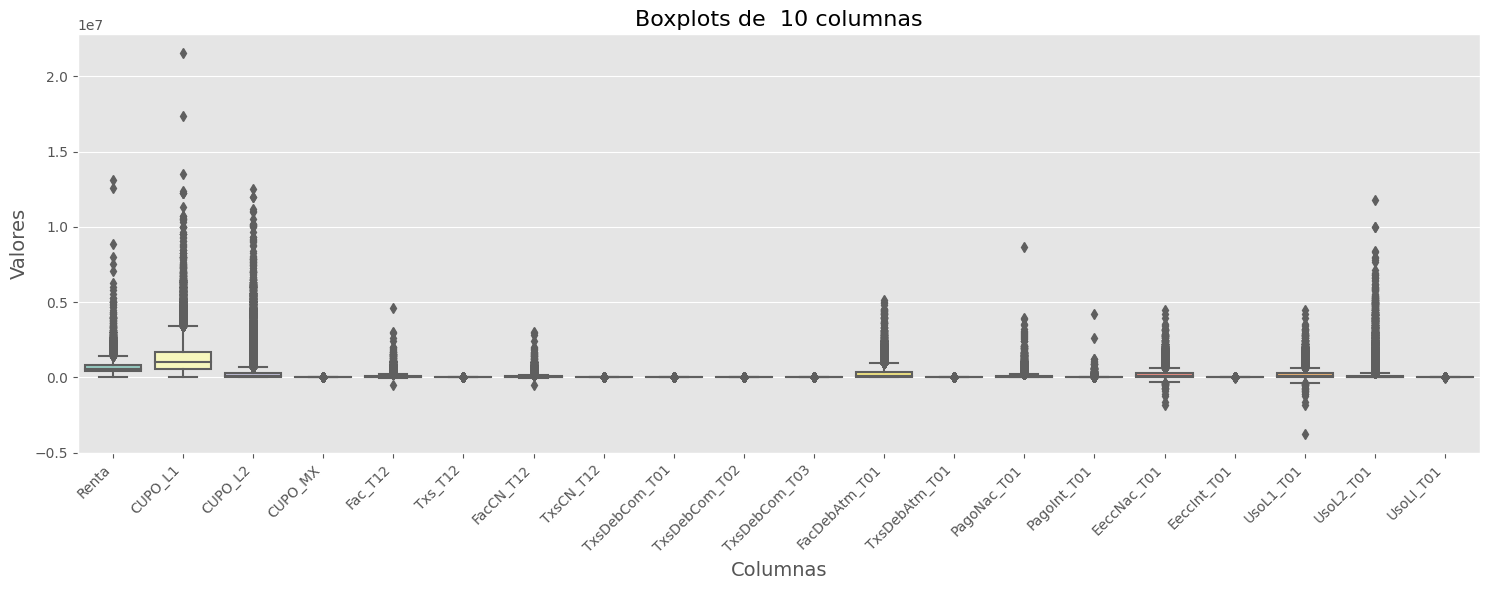

In [ ]:
columnas_a_mostrar=[ 'Renta', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12','TxsDebCom_T01','TxsDebCom_T02','TxsDebCom_T03', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'PagoNac_T01',
       'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01',
       'UsoLI_T01']
# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 6))
# Crear un boxplot para las primeras 10 columnas
sns.boxplot(data=df3[columnas_a_mostrar],  palette="Set3")

plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.title("Boxplots de  10 columnas", fontsize=16)
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se utiliza el  método estadístico. Se Calculan los cuartiles y rango intercuartílico(IQR), para identificar valores atípicos. Se puede visualizar en este grafico de cajas que existen muchos outliers en la variables , estos se deben eliminar  ya que afectan al k-means

In [ ]:
df4.shape

(31289, 320)

In [ ]:

# Calcular alguna medida de "outlierness" (por ejemplo, la distancia al tercer cuartil)
outlierness_measure = df4.apply(lambda row: row - df4.median(axis=0), axis=1).abs().sum(axis=1)

# Ordenar el DataFrame por la medida de "outlierness" en orden descendente
df_ordenado = df4.loc[outlierness_measure.sort_values(ascending=False).index]

# Eliminar las primeras 100 filas
df_sin_outliers = df_ordenado.iloc[100:]

# Reiniciar el índice del DataFrame resultante
df_sin_outliers.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante sin las 100 filas con outliers más altos
print("DataFrame sin las 100 filas con outliers más altos:")



DataFrame sin las 100 filas con outliers más altos:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#bingOutlier IdentificationIdentifying Outliers with Interquartile Range (IQR)
#calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


In [ ]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
#generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [ ]:
#Identifying Outliers with Skewness(distribucion normal)
# Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.
print(df['Income'].skew())
df['Income'].describe()
#6.499: 6.5 shows that the variable 'Income' has a right-skewed distribution, indicating the presence of extreme higher values

In [ ]:
plt.boxplot(df["Loan_amount"])
plt.show(
#boxplot: (minimum, first quartile (Q1), median, third quartile (Q3), and maximum)

In [ ]:
#ver outliers con scatterplot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Income'], df['Loan_amount'])
ax.set_xlabel('Income of applicants in USD')
ax.set_ylabel('Loan amount applied for in USD')
plt.show()

In [ ]:
#buscar filas outliers quantile-based flooring and capping.
print(df['Income'].quantile(0.10))
print(df['Income'].quantile(0.90))
 # 2950.1  12849,0

 #Now we will remove the outliers,
df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])
df["Income"] = np.where(df["Income"] >12681.0, 12681.0,df['Income'])
print(df['Income'].skew())
#1.04

In [ ]:
#Outlier Treatment
index = df[(df['Age'] >= 100)|(df['Age'] <= 18)].index
df.drop(index, inplace=True)
df['Age'].describe()

#cambia altiro el describe el max a 80

In [ ]:
#IQR Score ..calculated earlier to remove outliers.
#rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier,
#This shows that for our data, a lot of records get deleted if we use the IQR method.
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
#(364,6)

In [ ]:
#Log Transformation: Transformation of the skewed variables may also help correct the distribution of the variables.df["Log_Loanamt"] = df["Loan_amount"].map(lambda i: np.log(i) if i > 0 else 0)
print(df['Loan_amount'].skew())
print(df['Log_Loanamt'].skew())
#2.8244 -0,1788  The above output shows that the skewness value came down from 2.8 to -0.18,
#La salida anterior muestra que el valor de asimetría (skewness) disminuyó de 2.8 a -0.18, confirmando que la distribución ha sido tratada para los valores extremos


In [ ]:
df_sin_outliers.shape

In [ ]:
# Calcular cuantiles y rango intercuartílico (IQR) para cada columna
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para identificar outliers para cada columna
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers en cada fila
outliers = ((df3 < lower_limit) | (df3 > upper_limit)).any(axis=1)

# Mostrar cantidad de filas con outliers antes de la eliminación
print("Antes de la eliminación:")
num_rows_with_outliers = outliers.sum()
print(f"Filas con outliers: {num_rows_with_outliers}")

# Eliminar filas con outliers
df_outliers = df3[~outliers]

# Mostrar cantidad de filas después de la eliminación
print("\nDespués de la eliminación:-------------------------------------------------------------------------------------")
num_rows_after = len(df_outliers)
print(f"Filas después de la eliminación: {num_rows_after}")

Antes de la eliminación:
Filas con outliers: 31106

Después de la eliminación:-------------------------------------------------------------------------------------
Filas después de la eliminación: 183


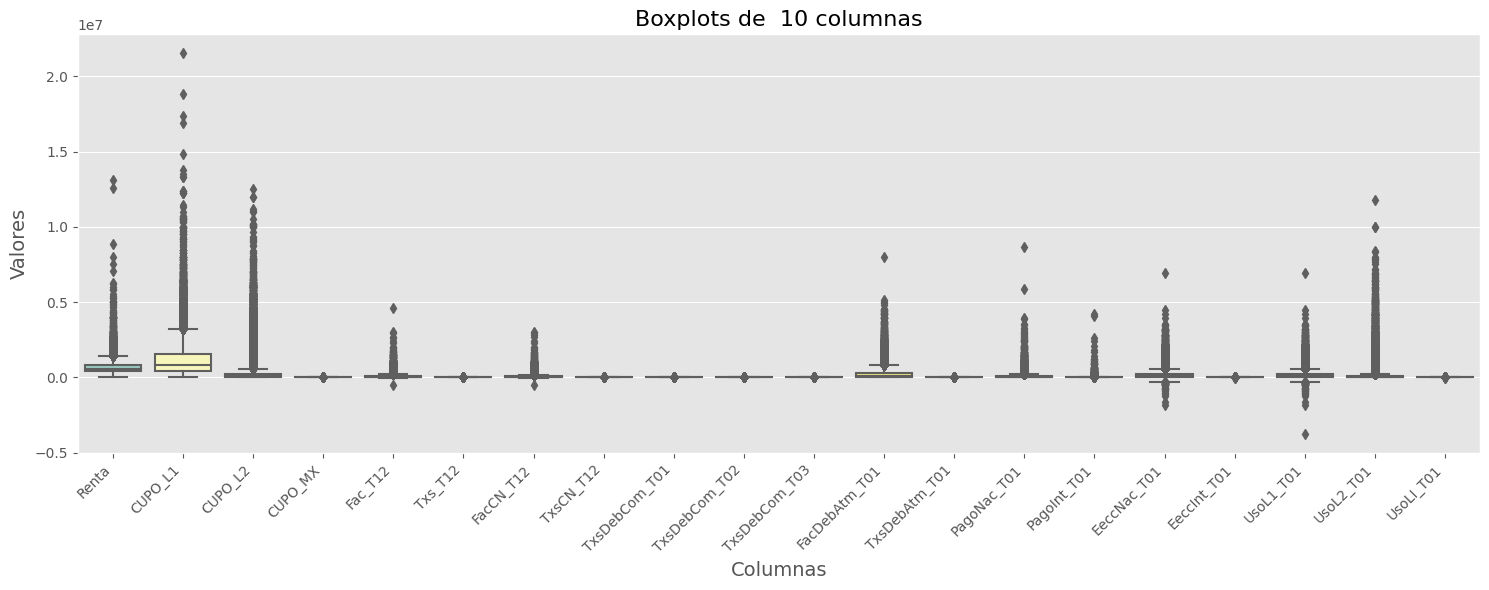

In [ ]:
columnas_a_mostrar=[ 'Renta', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12','TxsDebCom_T01','TxsDebCom_T02','TxsDebCom_T03', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'PagoNac_T01',
       'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01',
       'UsoLI_T01']
# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 6))
# Crear un boxplot para las primeras 10 columnas
sns.boxplot(data=df[columnas_a_mostrar],  palette="Set3")

plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.title("Boxplots de  10 columnas", fontsize=16)
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##BOxplot nuevo
Se puede visualizar que se eliminaron casi todo outliers de las variables de ejemplo.


In [ ]:
df.shape

(36234, 320)

El df quedo con 36234 filas despues de eliminar la mayoria de los outliers

In [ ]:
df.isnull().sum().sum()

1346500

##Escalado de variables


###La escala de los datos es muy diferente. Es necesario escalar los datos. Se deben dejar con media cero y desviación estándar 1.

In [ ]:
# Se crea primero el objeto Standard Scaler
scaler = StandardScaler()

# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
escaler_df=scaler.fit_transform(df)

# Finalmente aplicamos el escalamiento
#array_scaler = scaler.transform(df2)


###Reduccion de dimension
Componentes principales PCA

Vamos a ver la variabilidad de los componentes , nos damos cuenta que el aporte de la variabilidad es bajo [0.085015792, 0.0631413601, 0.0517427005, 0.036349639, 0.0310963137, 0.0233889333]de cada componente


In [ ]:
# Paso 1: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Paso 2: Inicializar el PCA
pca = PCA()

# Paso 3: Ajustar el PCA a tus datos escalados
principal_components = pca.fit_transform(X_scaled)

# Paso 4: Crear un DataFrame con los resultados del PCA
# Cada columna representará un componente principal
columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Opcional: Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Graficar la varianza explicada acumulativa
import matplotlib.pyplot as plt

cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()


ValueError: ignored

Componentes

In [ ]:
pca=PCA().fit(escaler_df)

ValueError: ignored

In [ ]:
pca.explained_variance_ratio_

array([6.54291627e-02, 5.04237219e-02, 4.78500687e-02, 4.01359450e-02,
       3.71706945e-02, 2.96268204e-02, 1.80382771e-02, 1.69507058e-02,
       1.43261298e-02, 1.38326281e-02, 1.29035973e-02, 1.14634604e-02,
       1.08302014e-02, 1.02660693e-02, 9.61697454e-03, 9.50749319e-03,
       8.98855888e-03, 8.57854653e-03, 8.30466553e-03, 7.88047317e-03,
       7.70963450e-03, 7.56827547e-03, 7.26054068e-03, 7.15956008e-03,
       6.94090248e-03, 6.88582889e-03, 6.77820141e-03, 6.71173612e-03,
       6.62282201e-03, 6.61080839e-03, 6.55846874e-03, 6.42846940e-03,
       6.41585044e-03, 6.27349622e-03, 6.16172391e-03, 6.06249576e-03,
       5.80309336e-03, 5.77816318e-03, 5.63335517e-03, 5.55659799e-03,
       5.47812091e-03, 5.44747697e-03, 5.42756008e-03, 5.34151220e-03,
       5.25144827e-03, 5.22593569e-03, 5.12475997e-03, 5.04226973e-03,
       4.87817004e-03, 4.82069862e-03, 4.74091714e-03, 4.70392350e-03,
       4.56094558e-03, 4.48776169e-03, 4.41703420e-03, 4.33700166e-03,
      

In [ ]:
pca.explained_variance_ratio_.shape

(559,)

numero de variables

In [ ]:
array_varianza=pca.explained_variance_ratio_

In [ ]:
np.cumsum(array_varianza)

array([0.06542916, 0.11585288, 0.16370295, 0.2038389 , 0.24100959,
       0.27063641, 0.28867469, 0.3056254 , 0.31995153, 0.33378415,
       0.34668775, 0.35815121, 0.36898141, 0.37924748, 0.38886446,
       0.39837195, 0.40736051, 0.41593906, 0.42424372, 0.43212419,
       0.43983383, 0.4474021 , 0.45466264, 0.4618222 , 0.46876311,
       0.47564894, 0.48242714, 0.48913887, 0.4957617 , 0.5023725 ,
       0.50893097, 0.51535944, 0.52177529, 0.52804879, 0.53421051,
       0.54027301, 0.5460761 , 0.55185427, 0.55748762, 0.56304422,
       0.56852234, 0.57396982, 0.57939738, 0.58473889, 0.58999034,
       0.59521627, 0.60034103, 0.6053833 , 0.61026147, 0.61508217,
       0.61982309, 0.62452701, 0.62908796, 0.63357572, 0.63799275,
       0.64232975, 0.64660001, 0.65077806, 0.6548928 , 0.65895541,
       0.66294697, 0.66682808, 0.67067647, 0.67446453, 0.6781371 ,
       0.68176423, 0.68530986, 0.68875087, 0.69213663, 0.69550569,
       0.69884978, 0.70211675, 0.70536121, 0.70854901, 0.71169

<function matplotlib.pyplot.show(close=None, block=None)>

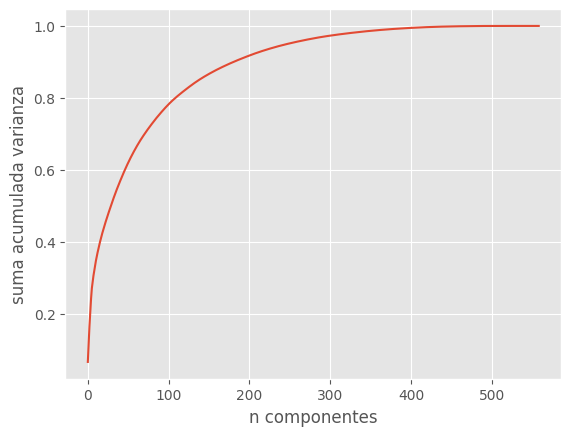

In [ ]:
plt.plot(np.cumsum(array_varianza))
plt.xlabel('n componentes')
plt.ylabel('suma acumulada varianza')
plt.show

In [ ]:
array_pca_sum=np.cumsum(array_varianza)

In [ ]:
np.where((array_pca_sum>0.85) & (array_pca_sum <0.9))

(array([138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
        151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
        177, 178, 179, 180]),)

Con este codigo extraemos la cantidad de componentes que me entregue sobre el  85 porciento de varianza es 139..



###N componente elegido

In [ ]:
n_componentes= 139

In [ ]:
pca_nuevo=PCA(n_components=139).fit_transform(escaler_df)

In [ ]:
pca_nuevo.shape

(42422, 139)

variables son 139 y los datos son un total de 42422

In [ ]:
pca_nuevo=PCA(n_components=139)
pca_valor=pca_nuevo.fit_transform(escaler_df)

In [ ]:
pca_nuevo.components_.shape

(139, 559)

cantidad componente =139
cantidad variables original=559

In [ ]:
pca_nuevo.components_.T

array([[ 0.00261855,  0.00448107,  0.00706847, ...,  0.07159822,
        -0.06685585,  0.04247795],
       [ 0.00071494,  0.00483711,  0.00471002, ...,  0.02640547,
        -0.03549399, -0.03337688],
       [ 0.00253546,  0.00388529,  0.00418047, ...,  0.00603781,
         0.01850488,  0.00929015],
       ...,
       [ 0.00140706,  0.00387681,  0.00376915, ..., -0.00132727,
        -0.01214408, -0.03261947],
       [ 0.01974357, -0.04134042, -0.01091099, ...,  0.02013707,
        -0.05773958,  0.04635572],
       [-0.01987379,  0.0666545 ,  0.08770312, ..., -0.1615766 ,
        -0.00723545, -0.05078449]])

In [ ]:
lista_pca=[f'PC{i}' for i in range(1,140)]

In [ ]:
df_5= pd.DataFrame(pca_nuevo.components_.T,columns=lista_pca,index=set_var)

ValueError: ignored

In [ ]:
set_var = list(set_var)
df5 = pd.DataFrame(pca_nuevo.components_.T, columns=lista_pca, index=set_var)


In [ ]:
df5.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139
PagoInt_T08,0.002619,0.004481,0.007068,-0.016818,0.010738,0.079005,0.022975,0.004065,-0.006582,0.005100,...,0.045474,-0.041472,-0.009558,0.084037,-0.058988,-0.066360,-0.035517,0.071598,-0.066856,0.042478
FlgActAI_T04,0.000715,0.004837,0.004710,-0.012437,0.002692,0.049736,0.012819,-0.013584,-0.009994,0.011102,...,0.013913,-0.014932,-0.018429,0.011370,0.016093,0.007799,0.061816,0.026405,-0.035494,-0.033377
FacAI_T10,0.002535,0.003885,0.004180,-0.012716,0.002991,0.048719,0.013778,0.014319,-0.013697,0.008271,...,-0.005882,-0.010151,-0.028053,0.024797,0.009929,-0.017452,-0.028979,0.006038,0.018505,0.009290
FlgActCI_T02,-0.002161,0.012168,0.015774,-0.024050,0.011795,0.089342,0.003172,-0.026600,-0.006151,-0.011481,...,0.008044,0.003877,-0.033291,0.155090,-0.046422,-0.094206,-0.083589,0.001981,-0.096139,0.082151
FlgActCN_T03,0.000688,-0.036257,-0.002160,0.004447,0.079068,-0.023032,-0.003661,-0.100999,-0.013827,-0.020187,...,-0.002305,0.034802,-0.002725,-0.007209,0.070862,0.057619,0.006043,-0.006445,0.018269,-0.037128
UsoLI_T10,0.009071,0.007810,0.012907,-0.031002,0.006656,0.109231,0.024932,0.031619,-0.024010,0.004452,...,0.010022,0.013822,-0.007133,0.059804,0.054142,-0.023020,0.081186,0.054957,0.059243,-0.012566
FacCCOT_T11,0.020875,0.028835,-0.011896,0.034994,0.011067,0.005285,0.008291,0.026886,0.008418,0.005956,...,0.018569,0.031960,0.031179,0.006751,0.004916,0.018267,-0.017708,0.004003,0.011073,-0.019866
TxsCI_T08,0.006156,0.008417,0.011296,-0.028308,0.011290,0.106249,0.020932,0.004653,-0.026302,0.003513,...,-0.009150,0.013235,-0.058707,0.083761,0.043463,-0.084907,-0.061329,0.028214,0.073573,0.049600
ColL1T0_T12,0.046247,-0.056363,0.035786,-0.005138,0.048236,-0.000513,-0.076654,0.083136,0.033484,0.002548,...,-0.027018,0.014763,-0.026246,0.115777,0.076267,0.149066,-0.005743,0.004548,-0.002644,0.037178
FacPAT_T09,0.040813,-0.057055,0.099075,0.061032,-0.051712,0.009665,0.009798,0.001672,0.029482,0.004444,...,-0.009667,0.012112,-0.002028,-0.001201,0.005272,0.002691,-0.007024,-0.000406,-0.000583,-0.011750
